In [3]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import os 
dir = os.getcwd()

In [4]:
gdp = pd.read_csv(dir + '/data/gdp.csv')
cbsi = pd.read_csv(dir + '/data/cbsi.csv')
ipi = pd.read_csv(dir + '/data/ipi.csv')

In [ ]:
ipi.head()

,통계표,계정항목,구분코드,단위,변환,2000/01,2000/02,2000/03,2000/04,2000/05,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,8.1.4. 전산업생산지수(농림어업제외),전산업생산지수(농림어업 제외),계절조정,2020=100,원자료,52.5,52.6,53.6,53.4,54.9,...,113.2,113.8,112.4,114.4,112.6,113.4,114.6,113.8,112.5,113.8


In [5]:
ipi.columns

Index(['통계표', '계정항목', '구분코드', '단위', '변환', '2000/01', '2000/02', '2000/03',
       '2000/04', '2000/05',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=311)

In [6]:
cbsi.columns

Index(['통계표', '업종코드', 'BSI코드', '단위', '변환', '2003/01', '2003/02', '2003/03',
       '2003/04', '2003/05',
       ...
       '2024/11', '2024/12', '2025/01', '2025/02', '2025/03', '2025/04',
       '2025/05', '2025/06', '2025/07', '2025/08'],
      dtype='object', length=277)

In [7]:
# 얘네 없애기
cols_to_drop = ['통계표', '계정항목', '구분코드', '단위', '변환']
ipi = ipi.drop(columns=cols_to_drop)

In [8]:
cols_to_drop = ['통계표', '업종코드', 'BSI코드', '단위', '변환']
cbsi = cbsi.drop(columns=cols_to_drop)

In [9]:
ipi = ipi.transpose()

In [10]:
cbsi = cbsi.transpose()

In [11]:
ipi.dropna(inplace=True)

In [12]:
ipi.columns = ['ipi']

In [13]:
cbsi

,0,1,2,3,4,5,6,7,8,9
2003/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003/02,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2
2003/03,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6
2003/04,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3
2003/05,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5
...,...,...,...,...,...,...,...,...,...,...
2025/04,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7
2025/05,86.3,90.0,92.7,87.7,91.4,86.8,93.8,87.9,83.8,87.2
2025/06,89.5,93.1,95.0,91.0,96.0,85.1,97.9,90.5,87.1,89.0
2025/07,89.4,93.4,94.5,91.3,95.1,85.8,96.7,90.9,86.7,89.2


In [14]:
new_col = ['전산업', '제조업', '대기업', '중소기업', '중화학공업', '경공업', '수출기업', '내수기업', '비제조업', '서비스업']
cbsi.columns = new_col


In [15]:
df = ipi.join(cbsi, how='right')

In [16]:
df = df.dropna()

In [17]:
df

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5
...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7
2025/05,112.5,86.3,90.0,92.7,87.7,91.4,86.8,93.8,87.9,83.8,87.2


In [18]:
#adf 테스트
def adf_test(timeseries, title):
    """ADF 테스트 수행 및 결과 해석"""
    result = adfuller(timeseries, autolag='AIC')
    
    print(f'=== {title} ADF Test 결과 ===')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("결과: 정상적(Stationary) - 귀무가설 기각")
    else:
        print("결과: 비정상적(Non-stationary) - 귀무가설 채택")
    print()

In [19]:
adf_test(df['ipi'], 'ipi')

=== ipi ADF Test 결과 ===
ADF Statistic: -1.142188
p-value: 0.697958
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
결과: 비정상적(Non-stationary) - 귀무가설 채택



In [20]:
df['ipi_2'] = df['ipi'].diff()

In [21]:
adf_test(df['ipi_2'].dropna(), 'ipi')

=== ipi ADF Test 결과 ===
ADF Statistic: -7.043191
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
결과: 정상적(Stationary) - 귀무가설 기각



In [22]:
adf_test(df['전산업'], 'cbsi_전산업')

=== cbsi_전산업 ADF Test 결과 ===
ADF Statistic: -3.338768
p-value: 0.013232
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
결과: 정상적(Stationary) - 귀무가설 기각



In [23]:
#R-squared랑 RMSE
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
reg1 = sm.OLS(df['ipi_2'], df['전산업'], missing='drop').fit()

In [ ]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ipi_2   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              8.362
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                     0.00415
Time:                        10:47:30   Log-Likelihood:                         -408.93
No. Observations:                 268   AIC:                                      819.9
Df Residuals:                     267   BIC:                                      823.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전산업            0.0020      0.001      2.892      0.004       0.001       0.003
==============================================================================
Omnibus:                        5.298   Durbin-Watson:                   2.568
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                6.056
Skew:                          -0.184   Prob(JB):                       0.0484
Kurtosis:                       3.638   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df.to_csv('ipi_cbsi.csv') # ipi 1차차분해서 정상시계열로 변환

In [ ]:
reg1.params

전산업    0.001969
dtype: float64

In [ ]:
os.listdir()

['analyze_data.py',
 'cbsi.csv',
 'gdp.csv',
 'ipi.csv',
 'ipi_cbsi.csv',
 'ipi_q.csv',
 'real_gdp.csv',
 'test1.ipynb',
 'your_data.xlsx',
 '어음교환 및 부도_16175009.csv']

In [ ]:
oo = pd.read_csv('어음교환 및 부도_16175009.csv')

In [ ]:
oo.columns

Index(['통계표', '계정항목', '단위', '변환', '1960/01', '1960/02', '1960/03', '1960/04',
       '1960/05', '1960/06',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=790)

In [ ]:
cols_to_drop = ['통계표', '계정항목', '단위', '변환']
oo = oo.drop(columns=cols_to_drop)

In [ ]:
oo.head()

,1960/01,1960/02,1960/03,1960/04,1960/05,1960/06,1960/07,1960/08,1960/09,1960/10,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,1.38,1.23,1.19,1.81,1.77,1.67,1.68,1.41,1.25,1.85,...,0.05,0.05,0.07,0.07,0.06,0.05,0.08,0.06,0.08,0.08
1,0.65,0.50,0.58,0.83,0.91,0.83,0.72,0.59,0.49,0.73,...,0.21,0.22,0.34,0.19,0.06,0.04,0.19,0.23,0.40,0.24
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07,0.11,0.21,0.12,0.06,0.04,0.07,0.06,0.24,0.11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
oo = oo.transpose()

<Axes: >

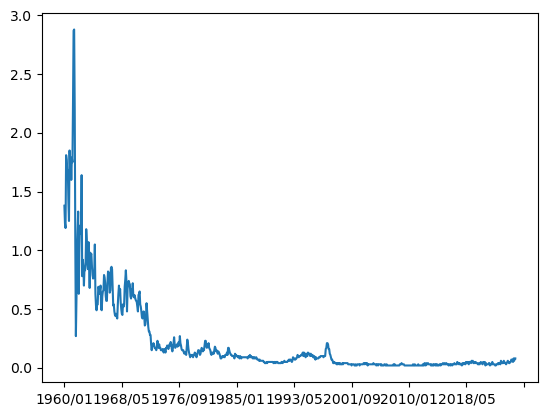

In [ ]:
oo[0].plot()

<Axes: >

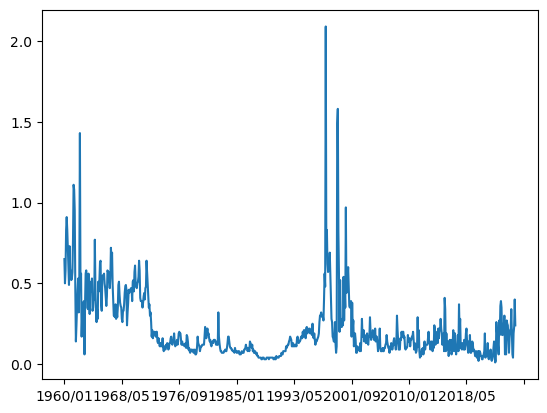

In [ ]:
oo[1].plot()

### 전산업생산지수(IPI)는 GDP 의 프록시가 될 수 있을까?

In [25]:
gdp = pd.read_csv(dir + '/data/gdp.csv')

In [26]:
gdp.columns

Index(['통계표', '계정항목', '단위', '변환', '2000/Q1', '2000/Q2', '2000/Q3', '2000/Q4',
       '2001/Q1', '2001/Q2',
       ...
       '2023/Q1', '2023/Q2', '2023/Q3', '2023/Q4', '2024/Q1', '2024/Q2',
       '2024/Q3', '2024/Q4', '2025/Q1', '2025/Q2'],
      dtype='object', length=106)

In [27]:
cols_to_drop = ['통계표', '계정항목', '단위', '변환']
gdp = gdp.drop(columns=cols_to_drop)

In [28]:
gdp = gdp.transpose()

In [29]:
gdp

,0
2000/Q1,2.0
2000/Q2,1.5
2000/Q3,2.7
2000/Q4,-0.3
2001/Q1,1.0
...,...
2024/Q2,-0.2
2024/Q3,0.1
2024/Q4,0.1
2025/Q1,-0.2


<Axes: >

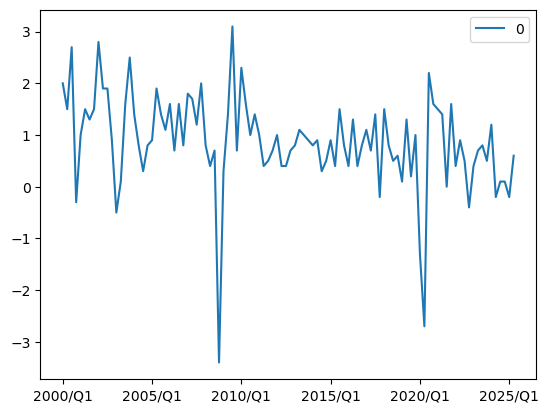

In [30]:
gdp.plot()

In [39]:
gdp.columns = ['gdp']

In [40]:
gdp

,gdp
2000/Q1,2.0
2000/Q2,1.5
2000/Q3,2.7
2000/Q4,-0.3
2001/Q1,1.0
...,...
2024/Q2,-0.2
2024/Q3,0.1
2024/Q4,0.1
2025/Q1,-0.2


In [33]:
ipi_q = pd.read_csv(dir + '/data/ipi_q.csv')
ipi_q.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [ ]:
cd = ['통계표', '계정항목', '구분코드', '단위', '변환']
ipi_q = ipi_q.drop(columns=cd)

In [43]:
ipi_q

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
Unnamed: 0,2000/Q1,2000/Q2,2000/Q3,2000/Q4,2001/Q1,2001/Q2,2001/Q3,2001/Q4,2002/Q1,2002/Q2,...,2023/Q1,2023/Q2,2023/Q3,2023/Q4,2024/Q1,2024/Q2,2024/Q3,2024/Q4,2025/Q1,2025/Q2
0,52.9,54.5,55.3,54.3,54.9,56.4,57.0,57.8,60.0,61.2,...,110.3,111.3,112.6,113.1,113.5,113.5,113.0,113.5,113.5,113.4


In [45]:
ipi_q = ipi_q.T

In [47]:
ipi_q.set_index('Unnamed: 0', inplace=True)

In [52]:
ipi_q.columns = ['ipi']

In [53]:
g_and_i = gdp.join(ipi_q, how='right')

In [54]:
g_and_i

,gdp,ipi
Unnamed: 0,,
2000/Q1,2.0,52.9
2000/Q2,1.5,54.5
2000/Q3,2.7,55.3
2000/Q4,-0.3,54.3
2001/Q1,1.0,54.9
...,...,...
2024/Q2,-0.2,113.5
2024/Q3,0.1,113.0
2024/Q4,0.1,113.5


In [59]:
g_and_i['ipi'] = g_and_i['ipi'].astype('float')

In [61]:
g_and_i['ipi_2'] = g_and_i['ipi'].pct_change().mul(100)

In [62]:
g_and_i

,gdp,ipi,ipi_2
Unnamed: 0,,,
2000/Q1,2.0,52.9,NaN
2000/Q2,1.5,54.5,3.024575
2000/Q3,2.7,55.3,1.467890
2000/Q4,-0.3,54.3,-1.808318
2001/Q1,1.0,54.9,1.104972
...,...,...,...
2024/Q2,-0.2,113.5,0.000000
2024/Q3,0.1,113.0,-0.440529
2024/Q4,0.1,113.5,0.442478


<Axes: xlabel='Unnamed: 0'>

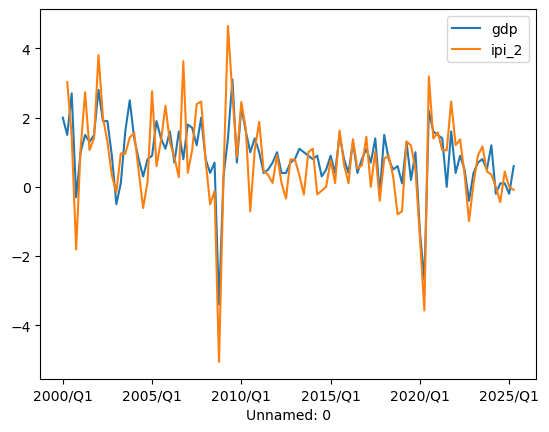

In [63]:
g_and_i[['gdp', 'ipi_2']].plot()

In [70]:
np.corrcoef(g_and_i['gdp'].iloc[1:], g_and_i['ipi_2'].iloc[1:])

array([[1.        , 0.78150594],
       [0.78150594, 1.        ]])

In [71]:
reg1 = sm.OLS(g_and_i['gdp'], sm.add_constant(g_and_i['ipi_2']), missing='drop').fit()

In [72]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           5.29e-22
Time:                        18:23:37   Log-Likelihood:                -86.616
No. Observations:                 101   AIC:                             177.2
Df Residuals:                      99   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4470      0.066      6.733      0.000       0.315       0.579
ipi_2          0.5446      0.044     12.463      0.000       0.458       0.631
==============================================================================
Omnibus:                        2.902   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.417
Skew:                          -0.214   Prob(JB):                        0.299
Kurtosis:                       3.625   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BK 필터 적용

In [74]:
import statsmodels.api as sm

In [76]:
real_gdp = pd.read_csv(dir + '/data/real_gdp.csv')
real_gdp.columns

Index(['Unnamed: 0', 'real_gdp', 'l_gdp', 'gdp_filtered'], dtype='object')

In [ ]:
cd = ['통계표', '계정항목', '단위', '변환']
real_gdp.drop(columns=cd, inplace=True)
real_gdp = real_gdp.T

In [ ]:
real_gdp.columns = ['real_gdp']

In [ ]:
real_gdp['real_gdp'] = real_gdp['real_gdp'].str.replace(',', '')

In [ ]:
real_gdp['real_gdp'] = real_gdp['real_gdp'].astype('float')

In [ ]:
real_gdp['l_gdp'] = np.log(real_gdp['real_gdp'])

In [79]:
real_gdp.set_index('Unnamed: 0', inplace=True)

In [ ]:
# --- 3. Applying the Band-Pass Filter ---

# The original documents specified a cycle of 6 to 32 quarters.
# Since the data is monthly:
# Low period: 6 quarters * 3 months/quarter = 18 months
# High period: 32 quarters * 3 months/quarter = 96 months
# The statsmodels `bkfilter` uses these periods for its low and high parameters.
real_gdp['gdp_filtered'] = sm.tsa.filters.bkfilter(
    real_gdp['l_gdp'],
    low=6,
    high=32,
    K=4  # K is the lead/lag length of the filter, 12 is common for monthly data
)

<Axes: xlabel='Unnamed: 0'>

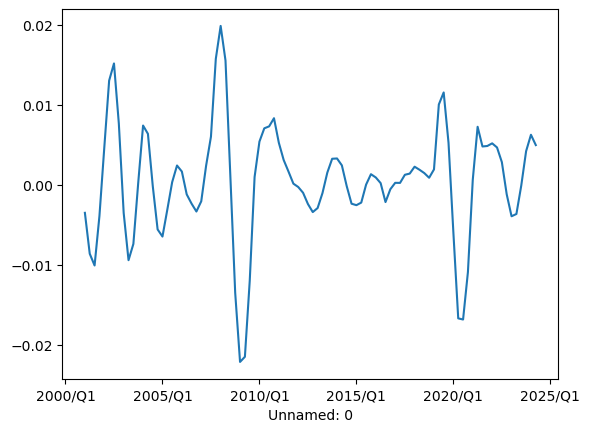

In [80]:
real_gdp['gdp_filtered'].plot()

In [ ]:
real_gdp.to_csv('real_gdp.csv')

In [ ]:
ipi

,ipi
2000/01,52.5
2000/02,52.6
2000/03,53.6
2000/04,53.4
2000/05,54.9
...,...
2025/02,113.4
2025/03,114.6
2025/04,113.8
2025/05,112.5


In [82]:
g_and_i['l_ipi'] = np.log(g_and_i['ipi'])

In [83]:
g_and_i

,gdp,ipi,ipi_2,l_ipi
Unnamed: 0,,,,
2000/Q1,2.0,52.9,NaN,3.968403
2000/Q2,1.5,54.5,3.024575,3.998201
2000/Q3,2.7,55.3,1.467890,4.012773
2000/Q4,-0.3,54.3,-1.808318,3.994524
2001/Q1,1.0,54.9,1.104972,4.005513
...,...,...,...,...
2024/Q2,-0.2,113.5,0.000000,4.731803
2024/Q3,0.1,113.0,-0.440529,4.727388
2024/Q4,0.1,113.5,0.442478,4.731803


In [ ]:
ipi_q.to_csv('ipi_q.csv')

In [84]:
g_and_i['ipi_filtered'] = sm.tsa.filters.bkfilter(
    g_and_i['l_ipi'],
    low=6,
    high=32,
    K=4  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [85]:
g_and_i

,gdp,ipi,ipi_2,l_ipi,ipi_filtered
Unnamed: 0,,,,,
2000/Q1,2.0,52.9,NaN,3.968403,NaN
2000/Q2,1.5,54.5,3.024575,3.998201,NaN
2000/Q3,2.7,55.3,1.467890,4.012773,NaN
2000/Q4,-0.3,54.3,-1.808318,3.994524,NaN
2001/Q1,1.0,54.9,1.104972,4.005513,-0.010638
...,...,...,...,...,...
2024/Q2,-0.2,113.5,0.000000,4.731803,0.003769
2024/Q3,0.1,113.0,-0.440529,4.727388,NaN
2024/Q4,0.1,113.5,0.442478,4.731803,NaN


In [ ]:
sum(g_and_i['ipi_filtered'].isna())

8

In [ ]:
g_and_i.head(30)

,gdp,0,ipi_2,l_ipi,ipi_filtered
2000/Q1,2.0,52.9,NaN,3.968403,NaN
2000/Q2,1.5,54.5,3.024575,3.998201,NaN
2000/Q3,2.7,55.3,1.467890,4.012773,NaN
2000/Q4,-0.3,54.3,-1.808318,3.994524,NaN
2001/Q1,1.0,54.9,1.104972,4.005513,-0.010638
2001/Q2,1.5,56.4,2.732240,4.032469,-0.016163
2001/Q3,1.3,57.0,1.063830,4.043051,-0.011314
2001/Q4,1.5,57.8,1.403509,4.056989,0.000446
2002/Q1,2.8,60.0,3.806228,4.094345,0.009418
2002/Q2,1.9,61.2,2.000000,4.114147,0.014608


In [ ]:
g_and_i.to_csv('gpd_proxy.csv')

In [ ]:
#상수항 안넣은거
reg2 = sm.OLS(real_gdp['gdp_filtered'], g_and_i['ipi_filtered'], missing='drop').fit()

In [ ]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           gdp_filtered   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              411.8
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                    6.32e-36
Time:                        10:50:10   Log-Likelihood:                          410.19
No. Observations:                  94   AIC:                                     -818.4
Df Residuals:                      93   BIC:                                     -815.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ipi_filtered     0.6698      0.033     20.292      0.000       0.604       0.735
==============================================================================
Omnibus:                        2.786   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.117
Skew:                          -0.299   Prob(JB):                        0.347
Kurtosis:                       3.427   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
x = sm.add_constant(g_and_i['ipi_filtered'])
y = real_gdp['gdp_filtered']
reg3 = sm.OLS(y, x, missing='drop').fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_filtered   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     406.9
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.54e-35
Time:                        18:33:57   Log-Likelihood:                 410.28
No. Observations:                  94   AIC:                            -816.6
Df Residuals:                      92   BIC:                            -811.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.000      0.420      0.675      -0.001       0.001
ipi_filtered     0.6693      0.033     20.172      0.000       0.603       0.735
==============================================================================
Omnibus:                        2.781   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.113
Skew:                          -0.299   Prob(JB):                        0.348
Kurtosis:                       3.426   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#시차 적용: bk필터 적용한 실질gdp ~ bk필터 적용한 산업생산지수
#시차 0일때가 가장 좋음 -> 동행성 강한 지표
for i in range(7):
    x = sm.add_constant(g_and_i['ipi_filtered']).shift(i)
    y = real_gdp['gdp_filtered']
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')
    

lag: 0 
 r-square: 0.8156042377777399 
 rmse: 0.003110785750253576
lag: 1 
 r-square: 0.6228050350896573 
 rmse: 0.00446647240492324
lag: 2 
 r-square: 0.10978579912508091 
 rmse: 0.00684025091796926
lag: 3 
 r-square: 0.040080954617208064 
 rmse: 0.007056469570970945
lag: 4 
 r-square: 0.27236144603975254 
 rmse: 0.006164564456341799
lag: 5 
 r-square: 0.28108019918517857 
 rmse: 0.0061520193483146895
lag: 6 
 r-square: 0.10576083796758506 
 rmse: 0.006783263180676013


In [88]:
from statsmodels.tools.eval_measures import rmse
rmse_bk = rmse(real_gdp['gdp_filtered'].dropna(), reg3.fittedvalues)
print(rmse_bk)

0.003077514357825064


In [89]:
g_and_i['cf_cycle'], g_and_i['cf_trend'] = sm.tsa.filters.cffilter(
    g_and_i['l_ipi'],
    low=6,
    high=32,
    drift=True
)

In [90]:
g_and_i

,gdp,ipi,ipi_2,l_ipi,ipi_filtered,cf_cycle,cf_trend
Unnamed: 0,,,,,,,
2000/Q1,2.0,52.9,NaN,3.968403,NaN,-0.004410,3.972813
2000/Q2,1.5,54.5,3.024575,3.998201,NaN,-0.000408,3.991059
2000/Q3,2.7,55.3,1.467890,4.012773,NaN,-0.001493,3.999167
2000/Q4,-0.3,54.3,-1.808318,3.994524,NaN,-0.008001,3.979876
2001/Q1,1.0,54.9,1.104972,4.005513,-0.010638,-0.015386,3.990700
...,...,...,...,...,...,...,...
2024/Q2,-0.2,113.5,0.000000,4.731803,0.003769,0.008267,3.991216
2024/Q3,0.1,113.0,-0.440529,4.727388,NaN,0.001515,3.986004
2024/Q4,0.1,113.5,0.442478,4.731803,NaN,-0.005672,3.990056


In [95]:
x = sm.add_constant(g_and_i['cf_cycle'])
y = real_gdp['gdp_filtered']
reg4 = sm.OLS(y, x, missing='drop').fit()

In [96]:
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_filtered   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           6.53e-18
Time:                        18:37:38   Log-Likelihood:                 369.00
No. Observations:                  94   AIC:                            -734.0
Df Residuals:                      92   BIC:                            -728.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.031e-05      0.000      0.181      0.857      -0.001       0.001
cf_cycle       0.3339      0.031     10.737      0.000       0.272       0.396
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.155
Skew:                           0.243   Prob(JB):                        0.561
Kurtosis:                       2.757   Cond. No.                         62.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
#시차 적용
for i in range(7):
    x = sm.add_constant(g_and_i['cf_cycle'])
    y = real_gdp['gdp_filtered'].shift(i)
    reg = sm.OLS(y, x, missing='drop').fit()
    yhat = reg.predict(x)
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.5561577104056381 
 rmse: 0.004826240645035668
lag: 1 
 r-square: 0.30033348702857454 
 rmse: 0.006059547262472659
lag: 2 
 r-square: 0.03700884376782687 
 rmse: 0.007108955281236782
lag: 3 
 r-square: 0.025765661617216717 
 rmse: 0.00715033434141071
lag: 4 
 r-square: 0.13955033443913722 
 rmse: 0.00671981579130762
lag: 5 
 r-square: 0.16575243480776414 
 rmse: 0.00663832113868574
lag: 6 
 r-square: 0.09894279918208981 
 rmse: 0.006911597438137582


In [ ]:
rmse_cf = rmse(real_gdp['gdp_filtered'].dropna(), reg3.fittedvalues)
print(rmse_cf)

0.004775473228053897


In [ ]:
print(rmse_bk, rmse_cf, sep='\n')

0.0030804653746965074
0.004775473228053897
